In [68]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Importing Libraries

In [69]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

### Reading Datasets

In [70]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [71]:
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


We can see that there are no null values in both training and test dataset so no cleaning is required

### Gettin the target value

In [73]:
y = train_data.pop("label")

In [74]:
train= train_data.to_numpy()
test = test_data.to_numpy()
train = train.reshape(-1, 28, 28, 1)/255
test = test.reshape(-1, 28, 28, 1)/255

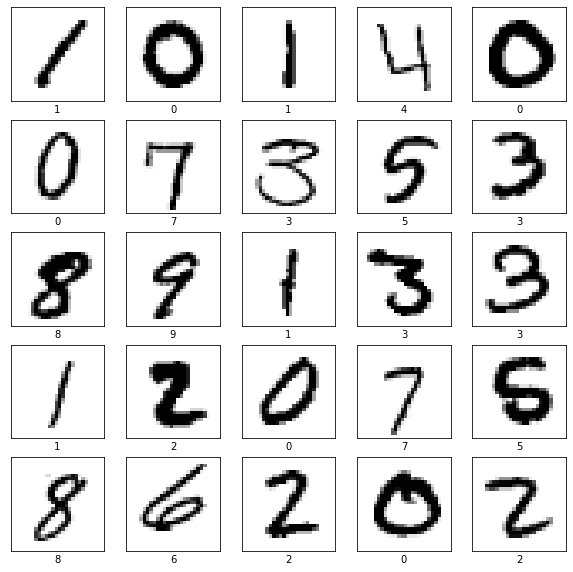

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train[i], cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(train, y , random_state=1, test_size=0.2)

In [93]:
Y_train = Y_train.to_numpy()

In [99]:
Y_train = keras.utils.to_categorical(Y_train, 10)

In [100]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, kernel_size = (3,3), activation = "relu", input_shape = (28, 28, 1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = "softmax")
])

In [101]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               346240    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(optimizer = "adam",
              loss="categorical_crossentropy",
              metrics=['accuracy']
             )

In [103]:
Y_train.shape

(33600, 10)

In [104]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.4395 - accuracy: 0.8682
Epoch 2/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0895 - accuracy: 0.9730
Epoch 3/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0509 - accuracy: 0.9855
Epoch 4/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 5/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0216 - accuracy: 0.9944
Epoch 6/20
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 7/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 8/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 9/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0070 - accuracy: 0.9980
Epoch 10/20
1050/1050 [==============================] - 10s 9ms/step 

In [147]:
predictions = []
output = pd.DataFrame()
output['ImageId'] = list(range(1,28001))

In [143]:
preds = model.predict(test)

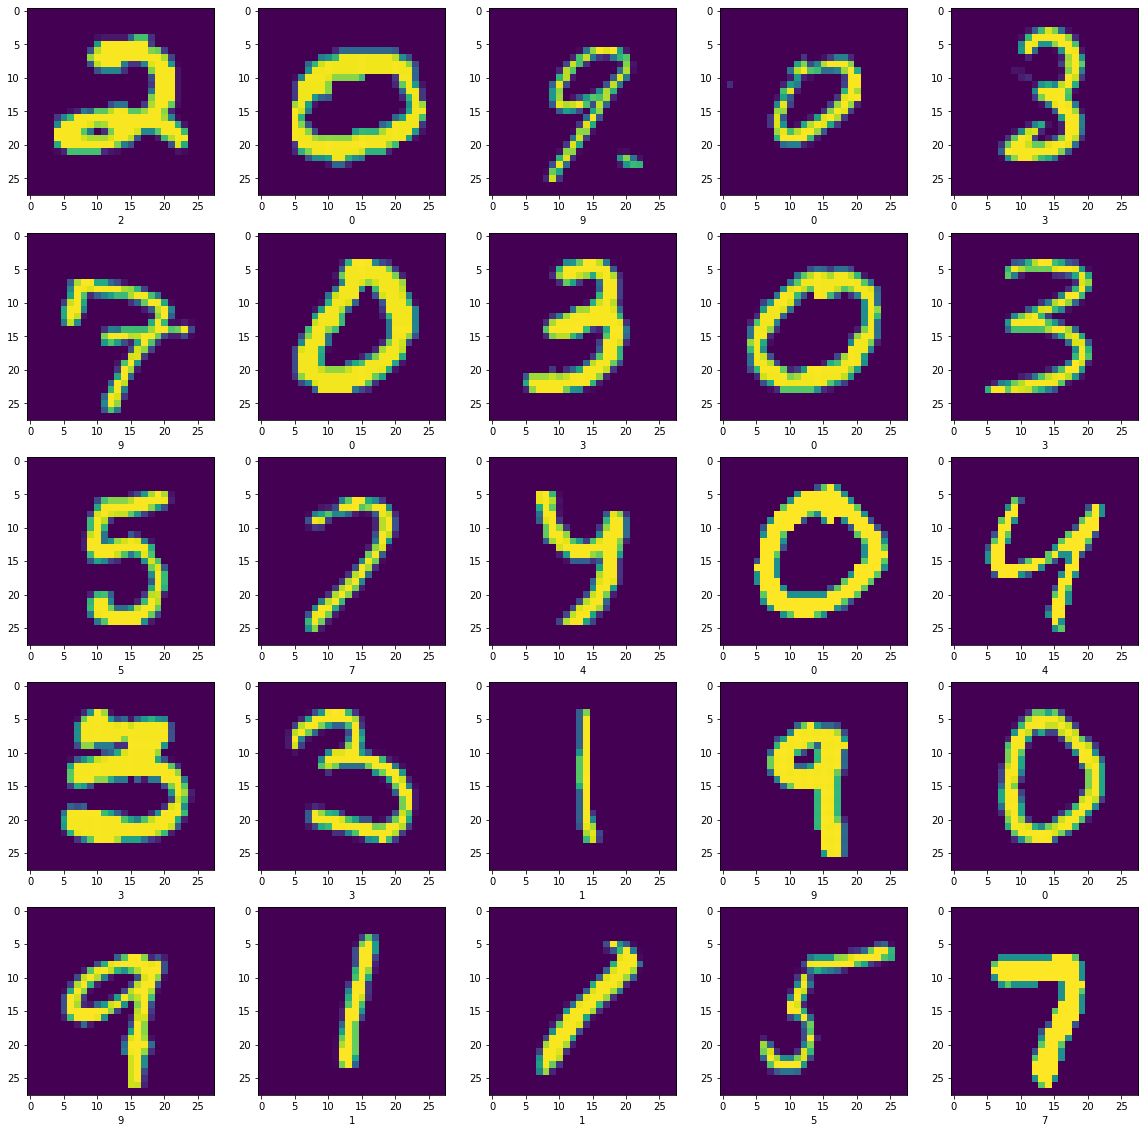

In [154]:
res = np.argmax(preds, axis = 1)
plt.figure(figsize = (20,20))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(test[i])
    plt.xlabel(res[i])
plt.show()


In [148]:
for p in preds:
    predictions.append(np.argmax(p))
    
output['Label'] = predictions
output.to_csv("my_submission.csv", index=False)